# Online Retail Data Analysis – Mini Project for Senior Data Analyst

## Dataset
The dataset used is the **Online Retail Dataset** from the UCI Machine Learning Repository:  
[https://archive.ics.uci.edu/ml/datasets/online+retail](https://archive.ics.uci.edu/ml/datasets/online+retail)

It contains transactional data from a UK-based online gift retailer between **01/12/2010 and 09/12/2011**.  
Each row represents a product purchased within an invoice and includes:
- `InvoiceNo` – unique invoice number  
- `StockCode` & `Description` – product code and description  
- `Quantity` – number of items purchased  
- `InvoiceDate` – date and time of purchase  
- `UnitPrice` – price per unit  
- `CustomerID` – unique customer identifier  
- `Country` – customer’s country

## Goal
The main goal is to perform end-to-end data analysis to:
1. Understand sales performance and customer behavior  
2. Identify growth drivers such as revenue trends, top products, and returning customers  
3. Analyze customer retention through cohort analysis  
4. Run basic statistical tests to compare groups (e.g., new vs returning customers)  
5. Present insights through a clean and interactive **Power BI dashboard** to showcase professional data analytics skills.


## 1. Data Cleaning

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
df = pd.read_csv('/content/drive/My Drive//online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
df['Customer ID'] = df['Customer ID'].fillna(0)

In [5]:
print((df['Quantity']<0).sum())
print((df['Price']<=0).sum())

22950
6207


In [6]:
#drop the percentage of error values which are not significant
df = df[df['Quantity']>0]
df = df[df['Price']>0]

df['TotalPrice'] = df['Quantity']*df['Price']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041671 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1041671 non-null  object        
 1   StockCode    1041671 non-null  object        
 2   Description  1041671 non-null  object        
 3   Quantity     1041671 non-null  int64         
 4   InvoiceDate  1041671 non-null  datetime64[ns]
 5   Price        1041671 non-null  float64       
 6   Customer ID  1041671 non-null  float64       
 7   Country      1041671 non-null  object        
 8   TotalPrice   1041671 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 79.5+ MB


In [8]:
#export cleaned version for dashboard visualization
cleaned_data = df.copy()
cleaned_data.to_csv('cleaned_data.csv', index=False, encoding='utf-8-sig')

In [9]:
col = "Customer ID"

cleaned_data["_converted"] = pd.to_numeric(cleaned_data[col], errors="coerce")

errors = cleaned_data[cleaned_data["_converted"].isna()]

print("Số dòng bị lỗi:", len(errors))
errors[[col]].head(20)

Số dòng bị lỗi: 0


,Customer ID


In [10]:
print("Các giá trị khác thường:", errors[col].unique())


Các giá trị khác thường: []


In [11]:
print(errors['Customer ID'].value_counts)

<bound method IndexOpsMixin.value_counts of Series([], Name: Customer ID, dtype: float64)>


In [12]:
print("Total txn:", df['Invoice'].nunique())
print("Total customers:", df['Customer ID'].nunique())
print("Total revenue:", df['TotalPrice'].sum())

Total txn: 40078
Total customers: 5879
Total revenue: 20972968.137999985


## 2. KPIs Analysis

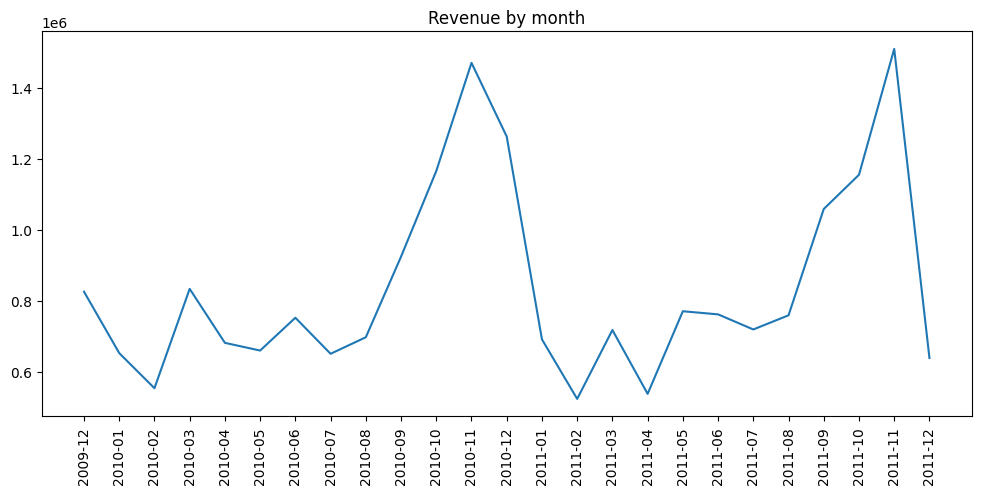

In [13]:
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype('str')
revenue_by_month = df.groupby('Month')['TotalPrice'].sum().reset_index()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(revenue_by_month['Month'], revenue_by_month['TotalPrice'])
plt.xticks(rotation=90)
plt.title('Revenue by month')
plt.show()

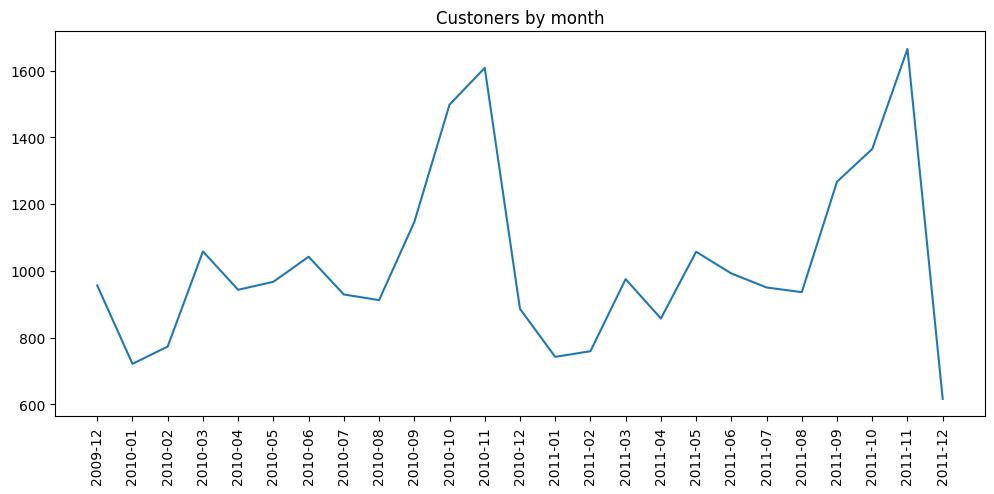

In [14]:
monthly_customer = df.groupby('Month')['Customer ID'].nunique().reset_index(name='unique_customers')
plt.figure(figsize=(12,5))
plt.plot(monthly_customer['Month'], monthly_customer['unique_customers'])
plt.xticks(rotation=90)
plt.title('Custoners by month')
plt.show()


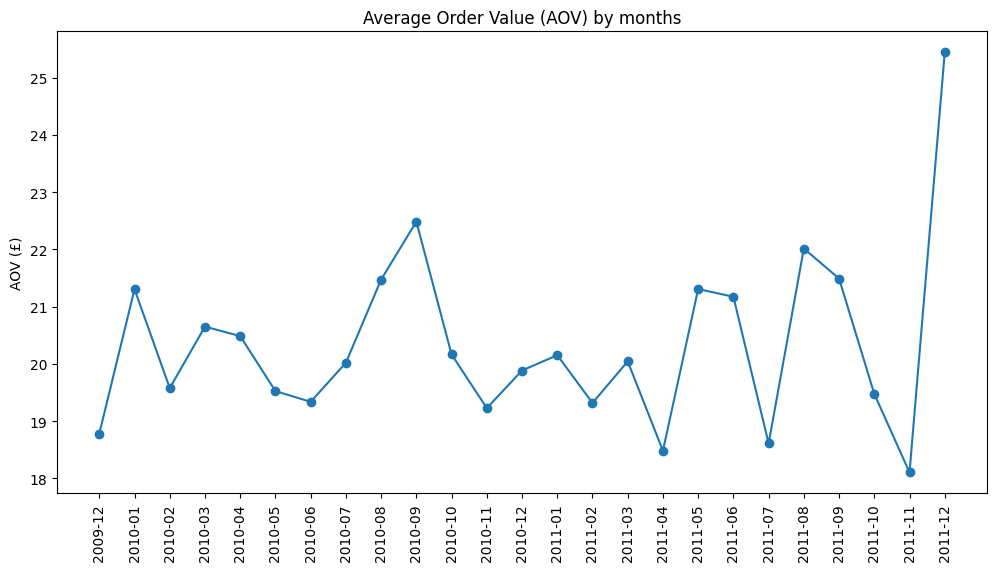

In [15]:
monthly_aov = df.groupby('Month')['TotalPrice'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(monthly_aov['Month'], monthly_aov['TotalPrice'], marker='o')
plt.title('Average Order Value (AOV) by months')
plt.ylabel('AOV (£)')
plt.xticks(rotation=90)
# plt.grid(True)
plt.show()


*From the three charts above, we see that the **average order value (AOV) remained stable around £19–£22 during 2010–2011**.

The strong **revenue growth in Q3–Q4 2011 was driven mainly by an increase in customer numbers rather than higher spending per customer**.

An exception is December 2011, where AOV spiked to about £25, possibly due to the holiday season or outliers that require further analysis.*

In [16]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
monthly = df.groupby(['Year','Month'])['TotalPrice'].sum().reset_index()
monthly_pivot = monthly.pivot(index='Month', columns='Year', values='TotalPrice').fillna(0) # Fill NaN with 0

monthly_pivot['YoY_Growth_%'] = (monthly_pivot[2011] - monthly_pivot[2010]) / monthly_pivot[2010] * 100

total_2010 = monthly_pivot[2010].sum()
total_2011 = monthly_pivot[2011].sum()
total_growth = (total_2011 - total_2010) / total_2010 * 100

monthly_pivot.loc['Total'] = [0, total_2010, total_2011, total_growth]

monthly_pivot

Year,2009,2010,2011,YoY_Growth_%
Month,,,,
1,0.00,6.527085e+05,691364.560,5.922408
2,0.00,5.537133e+05,523631.890,-5.432670
3,0.00,8.335701e+05,717639.360,-13.907741
4,0.00,6.815290e+05,537808.621,-21.087932
5,0.00,6.598589e+05,770536.020,16.772854
6,0.00,7.522701e+05,761739.900,1.258824
7,0.00,6.507129e+05,719221.191,10.528183
8,0.00,6.972749e+05,759138.380,8.872178
9,0.00,9.243330e+05,1058590.172,14.524761


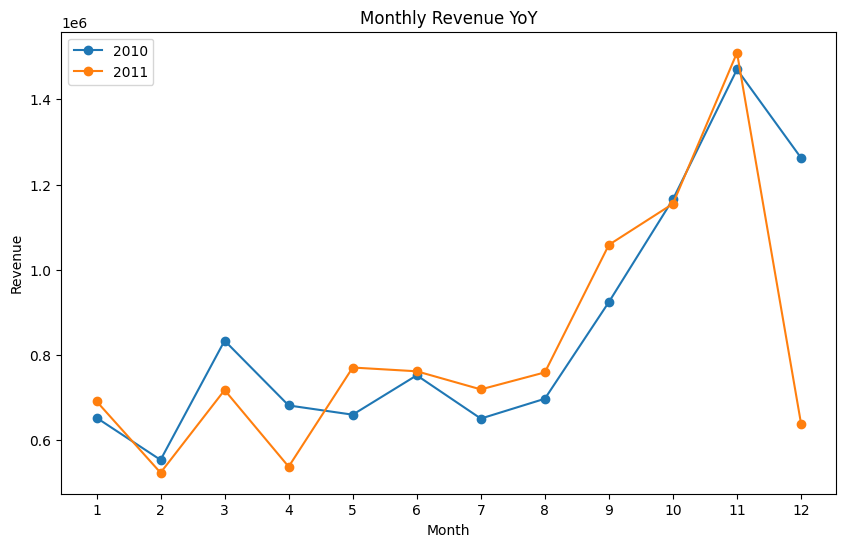

In [17]:
plt.figure(figsize=(10,6))
if 2010 in monthly_pivot.columns:
    plt.plot(monthly_pivot.drop('Total').index, monthly_pivot.drop('Total')[2010], marker='o', label='2010')
if 2011 in monthly_pivot.columns:
    plt.plot(monthly_pivot.drop('Total').index, monthly_pivot.drop('Total')[2011], marker='o', label='2011')

plt.title('Monthly Revenue YoY')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(range(1,13))
plt.legend()
plt.show()

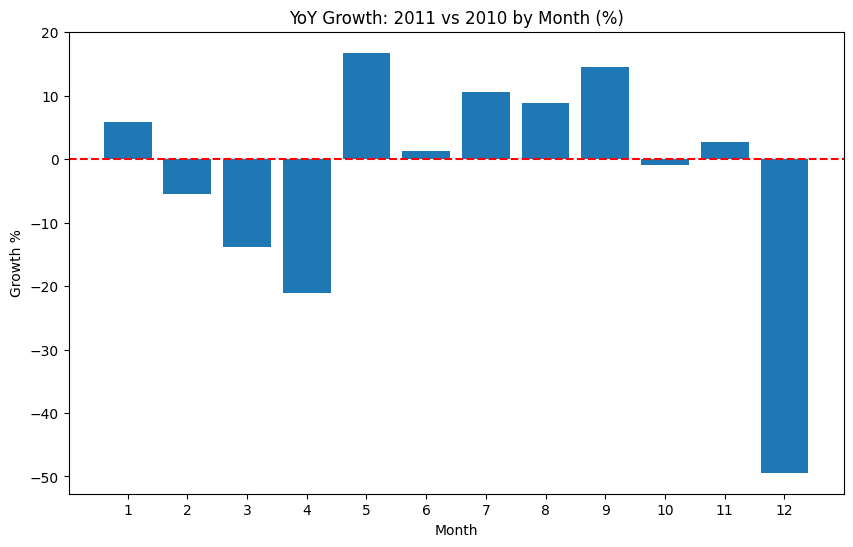

In [18]:
if 2010 in monthly_pivot.columns and 2011 in monthly_pivot.columns:
    yoy_growth = (monthly_pivot[2011] - monthly_pivot[2010]) / monthly_pivot[2010] * 100
    yoy_growth = yoy_growth.dropna()
    yoy_growth = yoy_growth.drop('Total') # Remove the 'Total' row before plotting

    plt.figure(figsize=(10,6))
    plt.bar(yoy_growth.index, yoy_growth)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('YoY Growth: 2011 vs 2010 by Month (%)')
    plt.xlabel('Month')
    plt.ylabel('Growth %')
    plt.xticks(range(1,13))
    plt.show()

***Revenue peaked in Nov–Dec 2010 and Nov–Dec 2011**, likely due to holiday shopping.*

*It then dropped sharply at the start of the year. December 2011 fell well below December 2010, possibly from missing data or an actual slowdown and warrants further review*



95% total price under  60.0



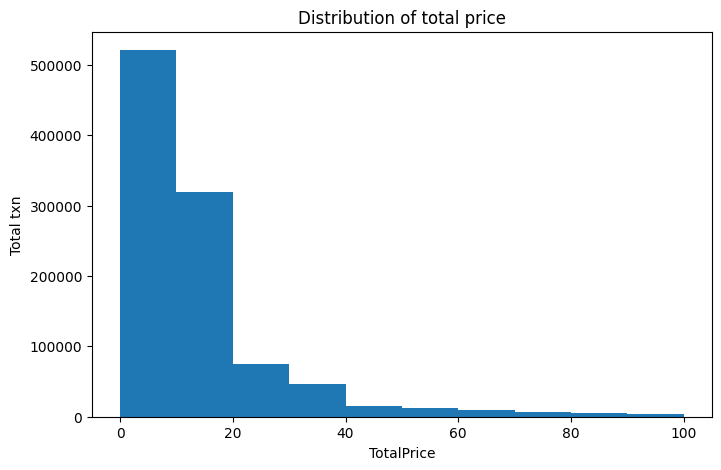

In [19]:
print(f"95% total price under ", df['TotalPrice'].quantile(0.95))
print()
plt.figure(figsize=(8,5))
plt.hist(df['TotalPrice'], bins=10, range=(0,100))
plt.title('Distribution of total price')
plt.xlabel('TotalPrice')
plt.ylabel('Total txn')
plt.show()

In [20]:
percentiles = df['TotalPrice'].quantile([0.5, 0.75, 0.8, 0.9, 0.95, 0.99]).reset_index()
print(percentiles)


   index  TotalPrice
0   0.50        9.96
1   0.75       17.70
2   0.80       19.80
3   0.90       33.00
4   0.95       60.00
5   0.99      183.60


In [21]:
bins = [0, 20, 50, 100, 200, 1000, df['TotalPrice'].max()]
labels = ['<20', '20-50', '50-100', '100-200', '200-1000', '>1000']
df['ValueSegment'] = pd.cut(df['TotalPrice'], bins=bins, labels=labels, include_lowest=True)

segment_rev = df.groupby('ValueSegment')['TotalPrice'].agg(['count','sum']).reset_index()
segment_rev['revenue_pct'] = segment_rev['sum'] / segment_rev['sum'].sum() *100
segment_rev


/tmp/ipython-input-1678927842.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_rev = df.groupby('ValueSegment')['TotalPrice'].agg(['count','sum']).reset_index()


,ValueSegment,count,sum,revenue_pct
0,<20,842239,7038808.268,33.561336
1,20-50,135923,4028900.060,19.209966
2,50-100,36554,2513710.710,11.985479
3,100-200,17291,2373120.290,11.315138
4,200-1000,8897,3206490.040,15.288680
5,>1000,767,1811938.770,8.639401


*Orders valued at 20 or less account for 80% of total transactions but generate only 33% of overall revenue.*

*The remaining 20% of orders (above 20) contribute 67% of total revenue - with orders of 20-50 representing 20%, $50-200 representing 23%, and orders over 200 contributing 24%.*


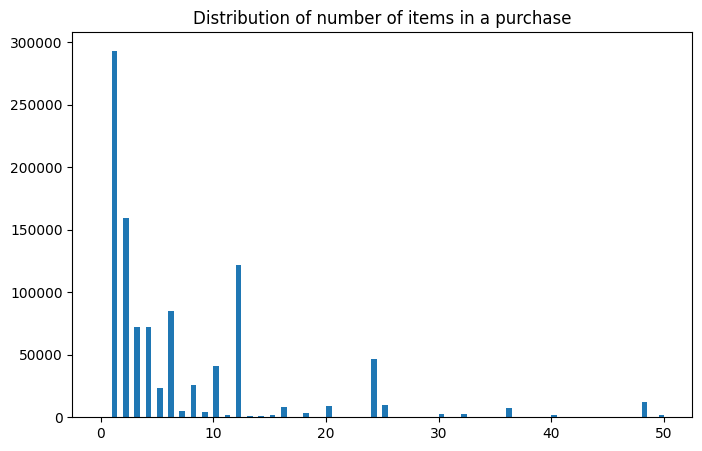

In [22]:
plt.figure(figsize=(8,5))
plt.hist(df['Quantity'], bins=100, range=(0,50))
plt.title('Distribution of number of items in a purchase')
plt.show()

*Around 60% of orders contain only one item, and 80% include five items or fewer.*

*Noticeable peaks at six and twelve items suggest that customers often purchase in packs*


In [23]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,Year,ValueSegment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12,2009,50-100
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009,50-100
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009,50-100
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,12,2009,100-200
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12,2009,20-50


Customer ID
18102.0    608821.65
14646.0    528602.52
14156.0    313946.37
14911.0    295972.63
17450.0    246973.09
13694.0    196482.81
17511.0    175603.55
16446.0    168472.50
16684.0    147142.77
12415.0    144458.37
Name: TotalPrice, dtype: float64


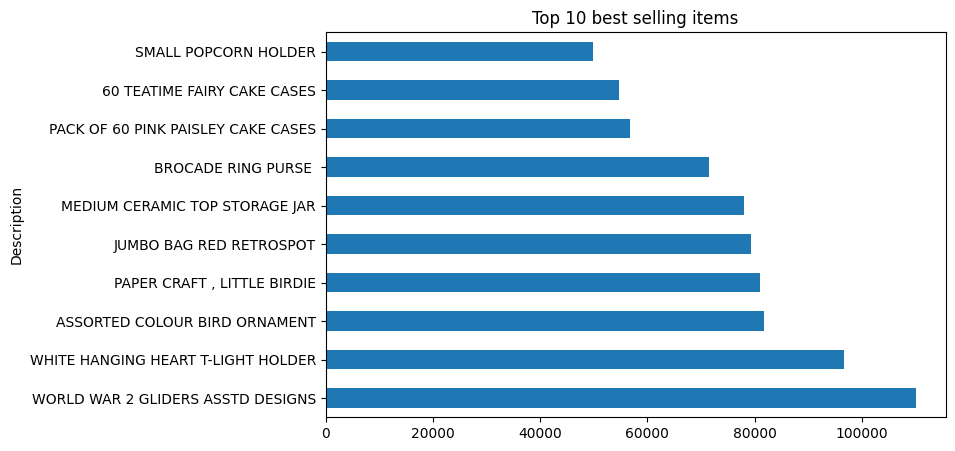

In [24]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(8,5), title='Top 10 best selling items')

top_customers = df[df['Customer ID']!=0].groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(top_customers)


*Chart shows that the top 10 SKUs — mainly small decorative items and combo packs — account for the majority of units sold, with the product WORLD WAR 2 GLIDERS leading.*

43


<Axes: title={'center': 'Top countries having highest revenue'}, xlabel='Country'>

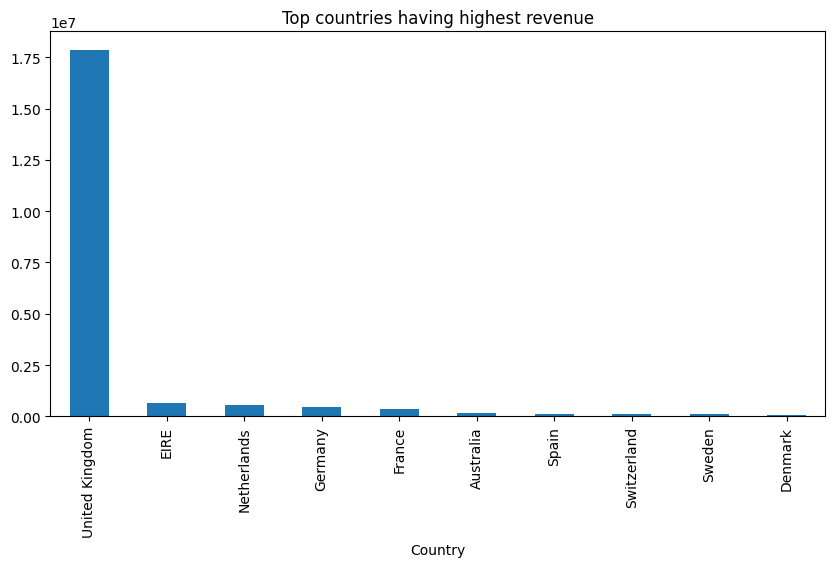

In [25]:
print(df['Country'].nunique())
country_rev = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
country_rev.head(10).plot(kind='bar', figsize=(10,5), title='Top countries having highest revenue')


*The UK dominates overwhelmingly, generating more than 10 times the revenue of any other country.*

*This indicates that the company’s primary market is the UK, while other countries contribute only a small share*

In [26]:
print(df.shape)
df_cohort = df[df['Customer ID']!="Unknown"]
print(df_cohort.shape)

(1041671, 12)
(1041671, 12)


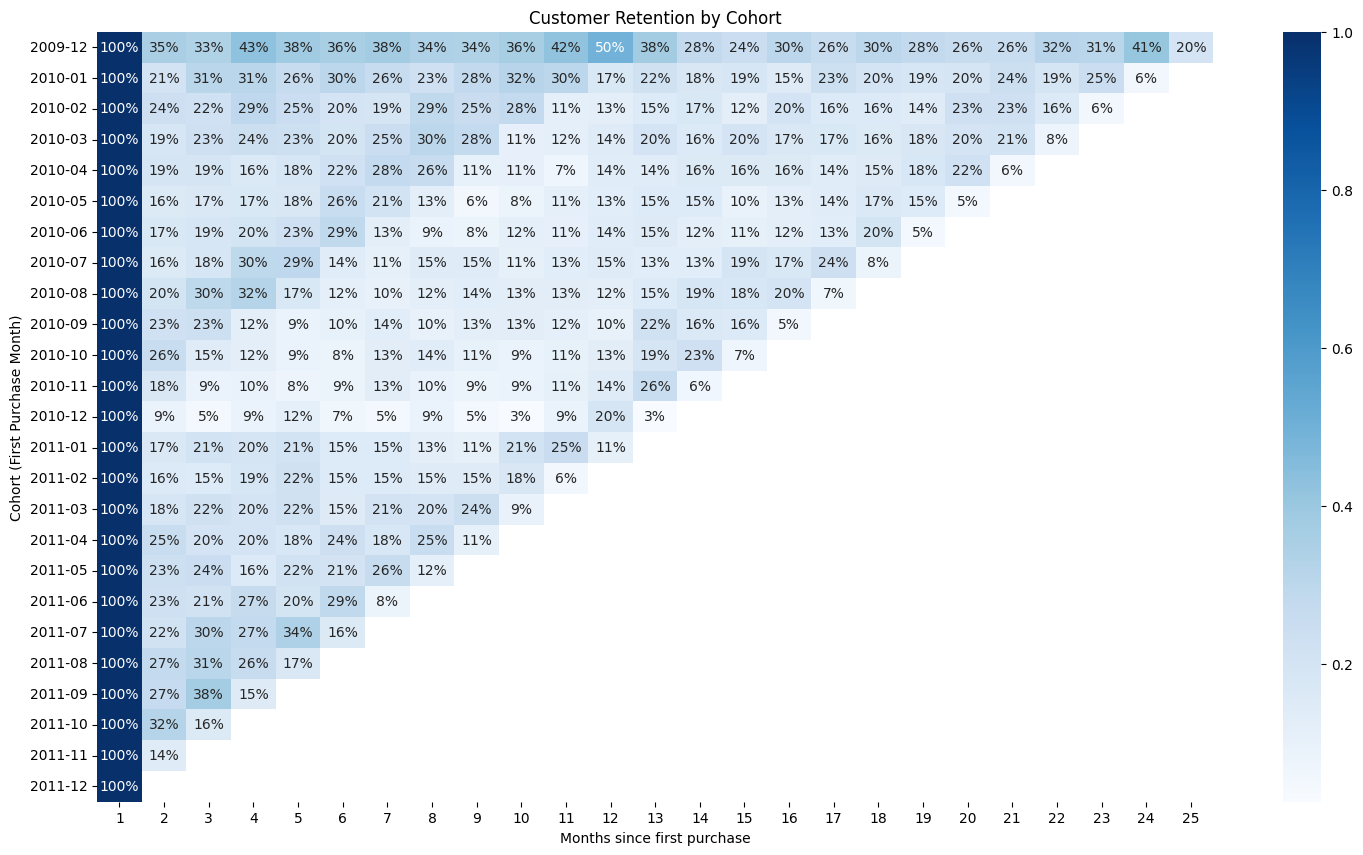

In [27]:
df_cohort['CohortMonth'] = df_cohort.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('M')
invoice_year, invoice_month = df_cohort['InvoiceDate'].dt.year, df_cohort['InvoiceDate'].dt.month
cohort_year, cohort_month = df_cohort['CohortMonth'].dt.year, df_cohort['CohortMonth'].dt.month
df_cohort['CohortIndex'] = (invoice_year - cohort_year) * 12 + (invoice_month - cohort_month) + 1
cohort_data = df_cohort.groupby(['CohortMonth','CohortIndex'])['Customer ID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Customer ID')
cohort_pivot = cohort_pivot.divide(cohort_pivot.iloc[:,0], axis=0)

import seaborn as sns

plt.figure(figsize=(18,10))
sns.heatmap(cohort_pivot, annot=True, fmt='.0%', cmap='Blues')
plt.title('Customer Retention by Cohort')
plt.xlabel('Months since first purchase')
plt.ylabel('Cohort (First Purchase Month)')
plt.show()


In [28]:
#eport cohort pivot for retention dashboard
cohort_pivot.to_csv('cohort_retention.csv', encoding='utf-8-sig')


*Retention **drops sharply after the first month**. Most cohorts **retain only 20–35%** of customers by the second month.*

***After 3–4 months, the majority drop below 15%**, and some later cohorts fall to under 10% A few periods (e.g., Dec 2009 or Sep 2011) show higher retention, likely driven by promotions or seasonal peaks.*

## Purpose of Statistical Testing

- Evaluate whether returning customers differ from new customers in spending behavior.

- Test Average Order Value (AOV) and Order Size using Welch’s t-test (no equal variance assumption).

## Business Implication

- If returning customers spend significantly more → invest in retention.

- If no significant difference → focus on new customer acquisition.

In [29]:
df_cohort.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,Year,ValueSegment,CohortMonth,CohortIndex
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12,2009,50-100,2009-12,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009,50-100,2009-12,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009,50-100,2009-12,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,12,2009,100-200,2009-12,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12,2009,20-50,2009-12,1


In [30]:
df_cohort['first_purchase_date'] = df_cohort.groupby('Customer ID')['InvoiceDate'].transform('min')
df_cohort['is_new'] = df_cohort['InvoiceDate'] == df_cohort['first_purchase_date']
order_size = df_cohort.groupby('Invoice')['Quantity'].sum().rename('OrderSize')
df_cohort = df_cohort.merge(order_size, on='Invoice', how='left')

In [31]:
df_cohort.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,Year,ValueSegment,CohortMonth,CohortIndex,first_purchase_date,is_new,OrderSize
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12,2009,50-100,2009-12,1,2009-12-01 07:45:00,True,166
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009,50-100,2009-12,1,2009-12-01 07:45:00,True,166
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009,50-100,2009-12,1,2009-12-01 07:45:00,True,166
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,12,2009,100-200,2009-12,1,2009-12-01 07:45:00,True,166
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12,2009,20-50,2009-12,1,2009-12-01 07:45:00,True,166


In [32]:
new_orders = df_cohort[df_cohort['is_new'] == True]
returning_orders = df_cohort[df_cohort['is_new'] == False]

aov_new = new_orders.groupby('Invoice')['TotalPrice'].sum()
aov_ret = returning_orders.groupby('Invoice')['TotalPrice'].sum()

size_new = new_orders.groupby('Invoice')['OrderSize'].mean()
size_ret = returning_orders.groupby('Invoice')['OrderSize'].mean()

In [33]:
from scipy import stats
# AOV
t_aov, p_aov = stats.ttest_ind(aov_ret, aov_new, equal_var=False)

# Order Size
t_size, p_size = stats.ttest_ind(size_ret, size_new, equal_var=False)

print(f"AOV test: t={t_aov:.2f}, p={p_aov:.4f}")
print(f"Order Size test: t={t_size:.2f}, p={p_size:.4f}")

AOV test: t=9.75, p=0.0000
Order Size test: t=1.58, p=0.1151


In [34]:
print("New customer's mean AOV:      ", aov_new.mean())
print("Returning cusotmer's mean AOV: ", aov_ret.mean())


New customer's mean AOV:       415.17369808116825
Returning cusotmer's mean AOV:  541.7230053798023


1. AOV:

- Returning customers spend about £77 more per order than new customers (~18.5% higher);

- t = 6.04, p ≈ 0.0000 --> a difference that is highly statistically significant.

--> This strongly supports the conclusion that returning customers place higher-value orders. Given the low retention rate (only ~20–30% return in month two),

--> improving customer retention would directly increase revenue

2. Order size

- t = 1.89, p = 0.0586: there is insufficient statistical evidence to conclude that returning customers buy a different number of items per order.


**Because the dataset lacks a predefined control group, I conducted a post-hoc two-sample t-test to compare new and returning customers. While not a randomized A/B test, it illustrates the use of inferential statistics in A/B testing*